In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import summarytools
import seaborn as sns

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')


In [494]:
data = pd.read_csv("Downloads//CAR DETAILS FROM CAR DEKHO.csv")
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [27]:
#Summary of the data
summarytools.dfSummary(data)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,name[object],1. Maruti Swift Dzire VDI2. Maruti Alto 800 LXI3. Maruti Alto LXi4. Maruti Alto LX5. Hyundai EON Era Plus6. Maruti Swift VDI BSIV7. Maruti Wagon R VXI BS IV8. Maruti Swift VDI9. Hyundai EON Magna Plus10. Maruti Wagon R LXI Minor11. other,"69 (1.6%)59 (1.4%)47 (1.1%)35 (0.8%)35 (0.8%)29 (0.7%)29 (0.7%)27 (0.6%)24 (0.6%)24 (0.6%)3,962 (91.3%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAG8AAACzCAYAAACHOUI0AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAACNUlEQVR4nO3asW0CQRRF0V2LcNIRgauigq2NClyVA4gnxyUYOzC+0jkxwUhX+sE+9sfjsdH09uoH8HvihYkXJl6YeGHihYkXts85L2OM81rrdr/fP179IJ73NsY4H8fxOcY4v/ox/IyzGSZemHhh4oWJFyZemHhh4oWJFyZemG+bYbs/IHU5m2HOZphJKMzZDBMvTLww8cLECxMvTLww8cLECxMvzLfNMJNQmLMZts85L9u2bU5mz8kU1OVshokXJl6YeGHihYkXJl6YeGHihYkXdlpr3V79CH7HJBTmbIaZhMJMQmHOZph4YeKFiRcmXph4YeKFiRcmXph4YSahMJNQmLMZZhIKMwmFOZth4oWJFyZemHhh4oWJFyZemHhh4oWZhMJMQmHOZphJKMwkFOZshokXJl6YeGHihYkXJl6YeGHihYkXZhIKMwmFOZthJqEwk1CYsxkmXph4YeKFiRcmXph4YeKFiRcmXphJKMwkFOZshpmEwkxCYc5mmHhh4oWJFyZemHhh4oWJFyZemHhh4oXZ88LseWHOZpg9L8yeF+ZshokXJl6YeGHihYkXJl6YeGHihYkXZhIKMwmFOZthJqEwk1CYsxkmXph4YeKFiRcmXph4YeKFiRcmXphJKMwkFOZshu1zzotl4f9Za92+m+lOY4zzcRyff/UonnO9Xt+/+42zGSZemHhh4oWJFyZemHhh4oWJFyZemG+b/9Qz3zZNQmHOZph4YeKFiRcmXph4YV/+O55MPBMQ0wAAAABJRU5ErkJggg=="">",0(0.0%)
2,year[int64],Mean (sd) : 2013.1 (4.2)min < med < max:1992.0 < 2014.0 < 2020.0IQR (CV) : 5.0 (477.6),27 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAABRElEQVR4nO3aMW6DQBBG4YkVCYpNi4t0XMC+gA/hE2yba+0J0uVGKUJNg4SEWxeW2AkE4v3fV68E0hMjsZqXaZoM5Tvs/QLYxuveL6CsaZprCOGYc7bv+5+u6z5/+yxC7yiEcIwxfuecTSm9L3kWo1sEX/SKPKPYzGwcx5OZZX3RSxF6RZ5RbGaWUrr85fvcY3SLILQIQosgtAhCiyC0CEKLILQIQosgtAhCiyC0CEKLILQIQosgtAgWD2Z4tka23BjxIvQM5wLfZhsjXoxuEYQWweh+EsMwnNu2/cg5+2jZn9BPoqqqtyXL/oxuEYQWQWgRhBZBaBGEFiH5e1XK/bWHZOhS7q89GN0iCC2C0CIILYLQIggtgtAiCC2imAsTxdsuj2JCK952eTC6RfzrL5pxvJ7NQ3vi1XV9ijF+5ZxVHMceNxTHTZ95XwHkAAAAAElFTkSuQmCC"">",0(0.0%)
3,selling_price[int64],Mean (sd) : 504127.3 (578548.7)min < med < max:20000.0 < 350000.0 < 8900000.0IQR (CV) : 391250.2 (0.9),445 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAAA70lEQVR4nO3csQ3CMBQAUUBIaUzrFHSegFWYIC1rZQKmosB1mlRhAkuJZDDK3WsdWV865Zc+Lsty0P6dWg+g3ziXDmKM9xBCv+aSaZreOednvbFUWzF0CKEfhuG15pJxHK/1RtI3uLohDA1haAhDQxgawtAQhoYwNIShIQwNYWgIQ0MYGsLQEIaGMDSEoSEMDWFoCENDGBrC0BCGhjA0hKEhDA1haAhDQxgawtAQhoYwNIShIQwNYWgIQ0MYGsLQEIaGMDSEoSEMDVF8InKLeZ5vKaXHmm99N7SNKqG7rrv4buh/c3VDVPmjt3DNt/EBRv4p/hH19B8AAAAASUVORK5CYII="">",0(0.0%)
4,km_driven[int64],Mean (sd) : 66215.8 (46644.1)min < med < max:1.0 < 60000.0 < 806599.0IQR (CV) : 55000.0 (1.4),770 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAAA80lEQVR4nO3bMQrCMBhAYRWhS1zbwS0n8CqeoKvXygk8lYOZu3SKJyi0EBvxvW9tCT88yBL+YynloP93aj2A9nFe+tD3/T2EMKw5ZJqmd875WW8s1bYYOoQwjOP4WnNISulabyR9g1c3hKEhDA1haAhDQxgawtAQhoYwNIShIQwNYWgIQ0MYGsLQEIaGMDSEoSEMDWFoCENDGBrC0BCGhjA0hKEhDA1haAhDQyxuU24xz/MtxvhY868rtm1UCd113cUV29/m1Q1haAhDQxgawtAQhoYwNIShIQwNYWgIQ0MYGsLQEFVer7bwSbON3UP7pNnGBxIYLiI0kiq6AAAAAElFTkSuQmCC"">",0(0.0%)
5,fuel[object],1. Diesel2. Petrol3. CNG4. LPG5. Electric,"2,153 (49.6%)2,123 (48.9%)40 (0.9%)23 (0.5%)1 (0.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAG8AAABRCAYAAADctfi9AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAABQUlEQVR4nO3ZsQnDMBBA0ZNxqVakSJ/Mkwk8myfIPulT2LV

In [106]:
from skimpy import skim
skim(data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 4340   │ │ string      │ 5     │                                                          │
│ │ Number of columns │ 8      │ │ int64       │ 3     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name       ┃ NA  ┃ NA %   ┃ mean     ┃ sd       ┃ p0      ┃ p25      ┃ p75     ┃ p100      ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ year              │   0 │      0 │     2000 │      4.2 │    2000 │     2000 │    2000 │      2000 │   ▁▄█▆ │  │
│ │ selling_price     │   0 │      0 │   500000 │   580000 │   20000 │   210000 │  600000 │   8900000 │   █    │  │
│ │ km_driven         │   0 │      0 │    66000 │    47000 │       1 │    35000 │   90000 │    810000 │   █    │  │
│ └───────────────────┴─────┴────────┴──────────┴──────────┴─────────┴──────────┴─────────┴───────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                ┃ NA     ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ name                       │      0 │          0 │                          4.7 │                    20000 │  │
│ │ fuel                       │      0 │          0 │                          4.7 │                    20000 │  │
│ │ seller_type                │      0 │          0 │                          4.7 │                    20000 │  │
│ │ transmission               │      0 │          0 │                          4.7 │                    20000 │  │
│ │ owner                      │      0 │          0 │                          4.7 │                    20000 │  │
│ └────────────────────────────┴────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

We observere that :

    Dimension of the data (rows, cols) : (4340,8)
    Duplicates : 763  (5.68 %)

In [26]:
#Basic information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


# Data Visualization

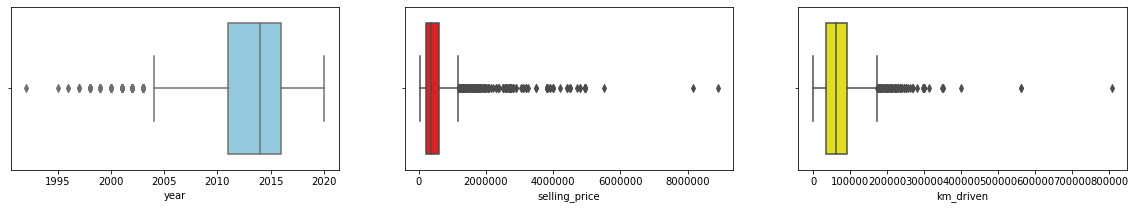

In [89]:
f = plt.figure(figsize=(20,3))
cols = ['year','selling_price','km_driven']
colors = ['skyblue','red','yellow']

index = 1
for col in cols:
    ax = f.add_subplot(1,3,index)
    plt.ticklabel_format(style='plain')
    sns.boxplot(ax=ax,data=data,x=col,color=colors[index-1])
    index=index+1


We do see many outliers


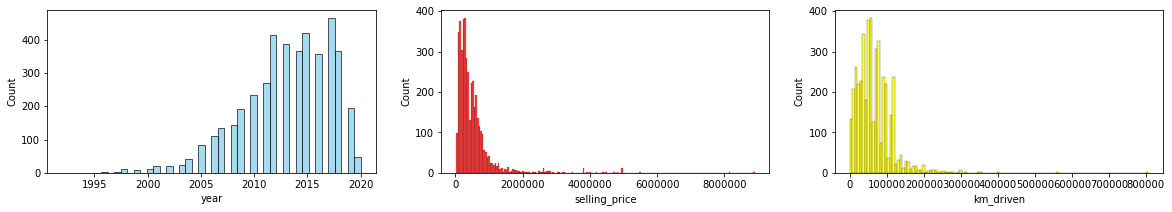

In [91]:

f = plt.figure(figsize=(20,3))
index = 1
for col in cols:
    plt.subplot(1,3,index)
    plt.ticklabel_format(style='plain')
    sns.histplot(data[col],color=colors[index-1])
    index=index+1



1. We can see Selling_price & Km_driven are Positively skewed
2. Lets see the histograms after applying log transformations 

<AxesSubplot:xlabel='km_driven', ylabel='Count'>

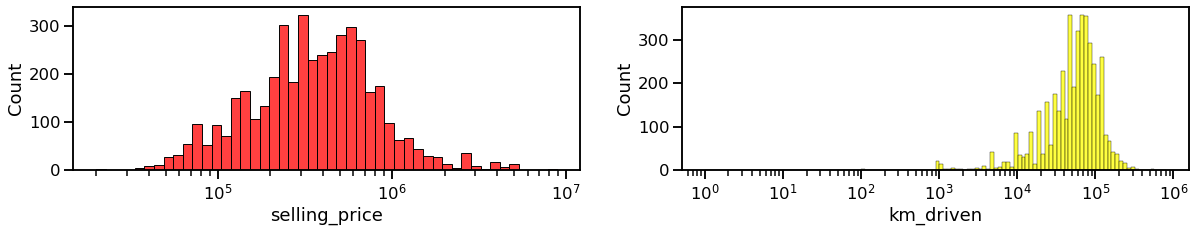

In [278]:
f = plt.figure(figsize=(20,3))
plt.subplot(1,2,1)
plt.ticklabel_format(style='plain')
plt.xscale("log")
sns.histplot(data['selling_price'],color=colors[1])

plt.subplot(1,2,2)
plt.ticklabel_format(style='plain')
plt.xscale("log")
sns.histplot(data['km_driven'],color=colors[2])


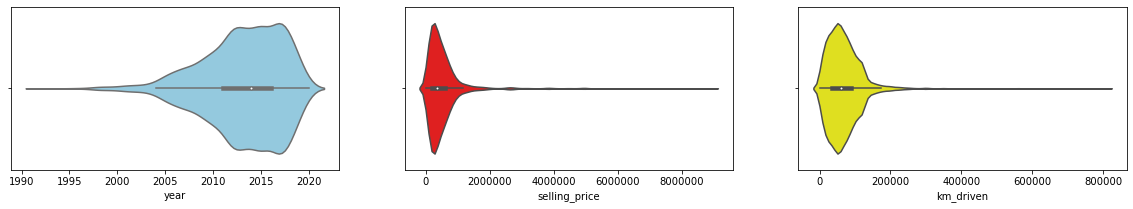

In [93]:
f = plt.figure(figsize=(20,3))
index = 1
for col in cols:
    ax = f.add_subplot(1,3,index)
    plt.ticklabel_format(style='plain')
    sns.violinplot(ax=ax,data=data,x=col,color=colors[index-1])
    index=index+1



In [96]:
print("Median for selling price:",np.median(data['selling_price']))
print("Median for year:",np.median(data['year']))
print("Median for km driven:",np.median(data['km_driven']))


Median for selling price: 350000.0
Median for year: 2014.0
Median for km driven: 60000.0


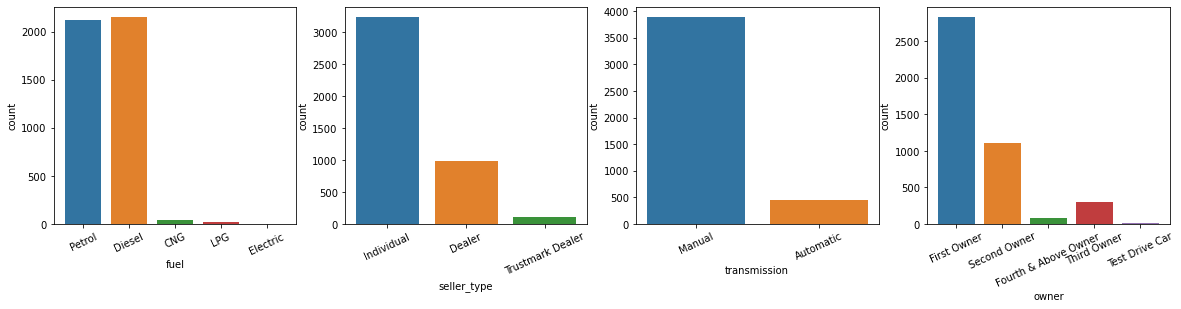

In [128]:
f = plt.figure(figsize=(20,4))
index = 1
cols = ['fuel','seller_type','transmission','owner']
for col in cols:
    ax = f.add_subplot(1,4,index)
    g=sns.countplot(data[col])
    plt.xticks(rotation = '25')
    plt.plot()

    patches = ax.patches
    index=index+1

1. We can see that 70% of people selling their cars are Individuals, while 22% are sellers and only 2% are Trustmark   
   Dealer
2. Most of cars are Diesel & Petrol with 49% and 48% and followed by CNG, LPG and Electric with least cars.  
3. Manul cars are of 89.7% & Automatic cars comprise of only 10.3%
4. 65% cars are owned by First owner and around 25% are second owners and rest are third & above owner and test drive 
   car.





<AxesSubplot:xlabel='year', ylabel='fuel'>

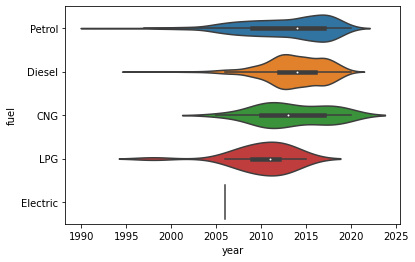

In [147]:
sns.violinplot(data['year'],data['fuel'])

<AxesSubplot:xlabel='year', ylabel='fuel'>

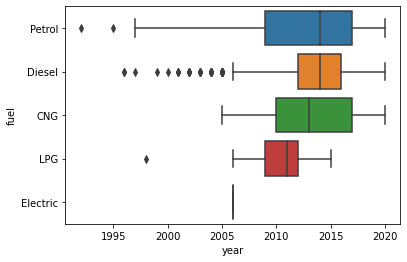

In [148]:
sns.boxplot(data['year'],data['fuel'])

In [209]:
gk=data.groupby('name')
gk.first()
gk.get_group('Ambassador CLASSIC 1500 DSL AC')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
3912,Ambassador CLASSIC 1500 DSL AC,2005,120000,50000,Diesel,Individual,Manual,Second Owner
4016,Ambassador CLASSIC 1500 DSL AC,2005,120000,50000,Diesel,Individual,Manual,Second Owner


<AxesSubplot:xlabel='year', ylabel='Count'>

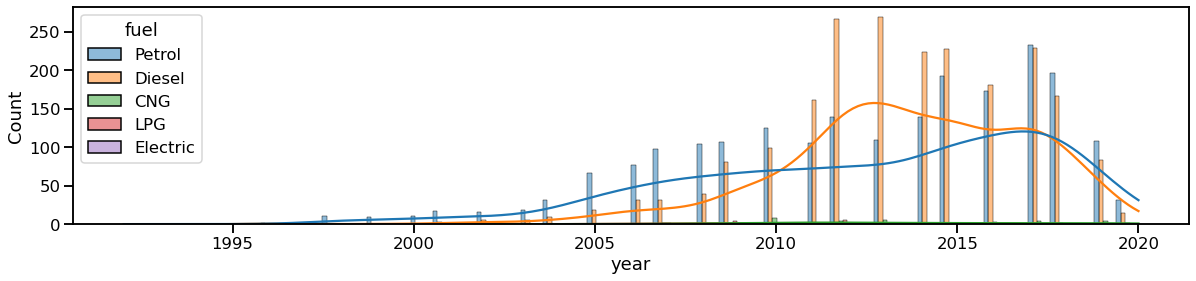

In [187]:
f = plt.figure(figsize=(20,4))
sns.histplot(data= data , x = 'year', hue = 'fuel',kde =True,multiple="dodge")

<AxesSubplot:xlabel='year', ylabel='Count'>

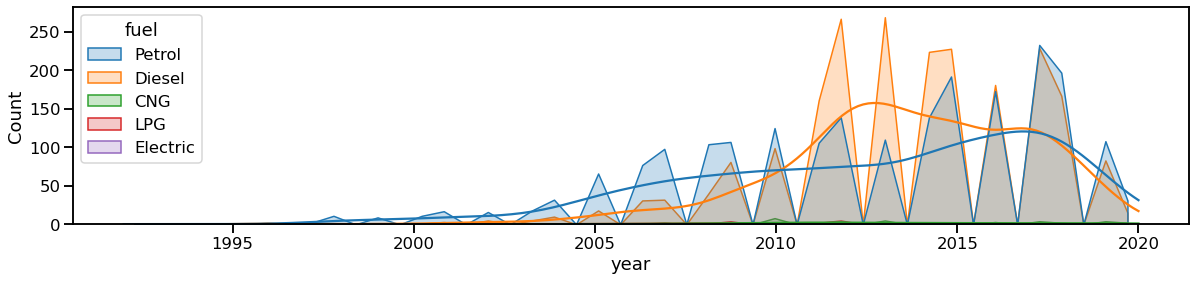

In [280]:
f = plt.figure(figsize=(20,4))
sns.histplot(data= data , x = 'year', hue = 'fuel',kde =True,element="poly")


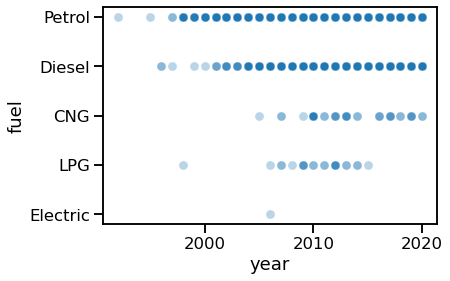

In [172]:
sns.scatterplot(x="year", 
                y="fuel",
                alpha=0.3,
                data=data)
plt.show()

<AxesSubplot:xlabel='selling_price', ylabel='fuel'>

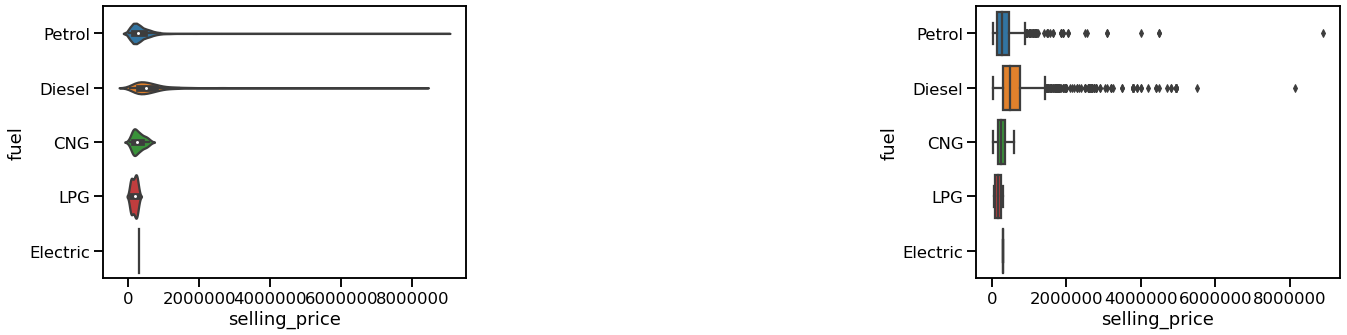

In [217]:
f = plt.figure(figsize=(30,5))
ax = f.add_subplot(1,4,1)
plt.ticklabel_format(style='plain')
sns.violinplot(data['selling_price'],data['fuel'])

ax = f.add_subplot(1,4,3)
plt.ticklabel_format(style='plain')
sns.boxplot(data['selling_price'],data['fuel'])


<AxesSubplot:xlabel='selling_price', ylabel='Count'>

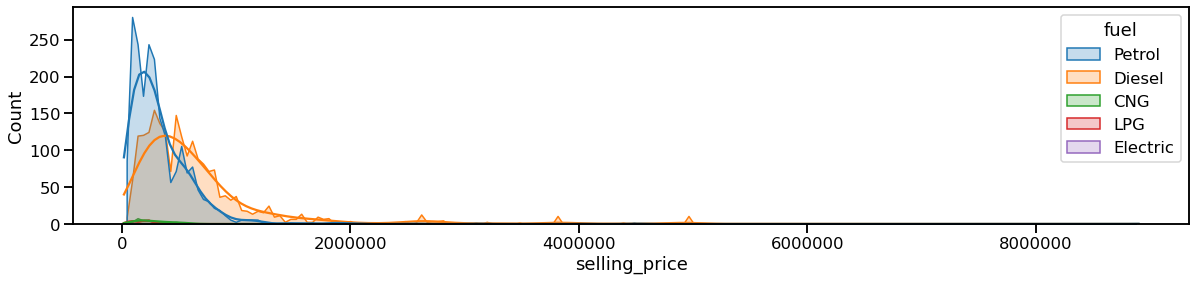

In [282]:
f = plt.figure(figsize=(20,4))
plt.ticklabel_format(style='plain')
sns.histplot(data= data , x = 'selling_price', hue = 'fuel',kde =True,element="poly")


1. The selling price is more for most of the diesel cars  when compared to the petrol cars.
2. The highest selling price is 8900000 for Petrol in the year 2016 and the 2nd highest is of 8150000 in the year 2017
3. We can see that data is Positively skewed 

--------------------------------------------------------------------
      Fuel | Highest selling_price | Lowest selling_price
----------------------------------------------------------------
     Petrol            8900000                20000
     Diesel            8150000                45000
     CNG               595000                 45000
     Electric          310000                   -
--------------------------------------------------------------------
     

<AxesSubplot:title={'center':'After applying log transformation on selling_price'}, xlabel='selling_price_log', ylabel='Count'>

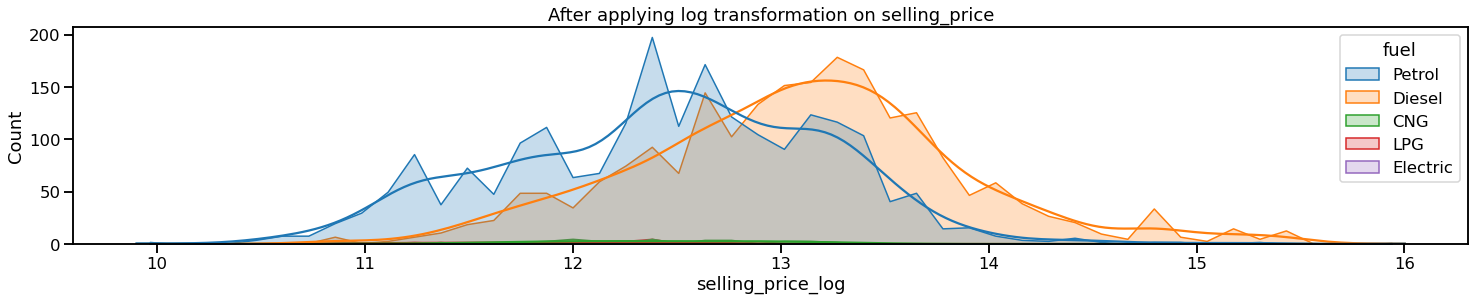

In [366]:
# Apply Log transformation on the data
data['selling_price_log']=np.log(data['selling_price'])

f = plt.figure(figsize=(25,4))
plt.ticklabel_format(style='plain')
plt.title("After applying log transformation on selling_price")
sns.histplot(data= data , x = 'selling_price_log', hue = 'fuel',kde =True,element="poly")

#Remove that column
del data['selling_price_log']

<AxesSubplot:xlabel='km_driven', ylabel='fuel'>

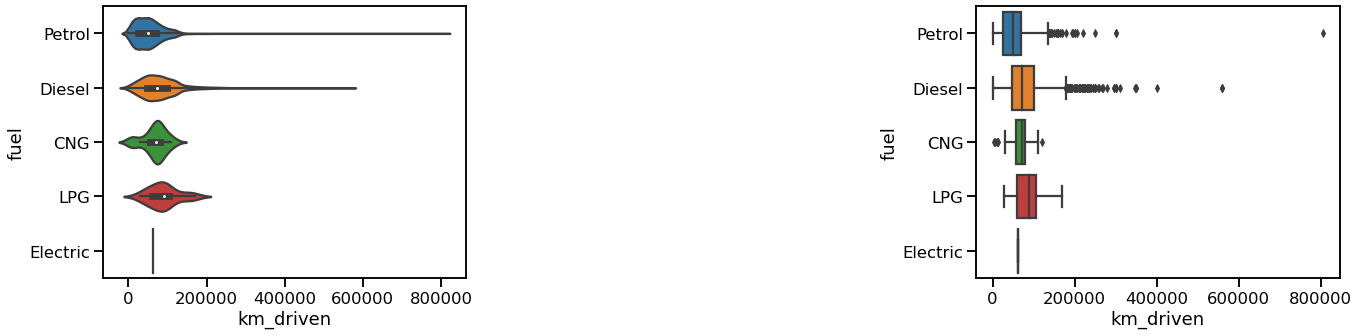

In [323]:
f = plt.figure(figsize=(30,5))
ax = f.add_subplot(1,4,1)
plt.ticklabel_format(style='plain')
sns.violinplot(data['km_driven'],data['fuel'])

ax = f.add_subplot(1,4,3)
plt.ticklabel_format(style='plain')
sns.boxplot(data['km_driven'],data['fuel'])


In [378]:
data[data['km_driven'] == 1]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,km_driven_log
1312,Mahindra Quanto C6,2014,250000,1,Diesel,Individual,Manual,Second Owner,0.0


1. Most of the diesel cars have km_driven more when compared to the petrol cars.
2. The highest km_driven is 806599 for Petrol in the year 2009 and the 2nd highest is of 560000 for diesel in the year 2016
3. One observation is lowest kilometer for diesel cars is just 1km by an Individual seller_type &  owner type is of Second. 
4. The second lowest kilometer driven for diesel cars is 101 km
5. We can see that data is Positively skewed 

--------------------------------------------------------------------
      Fuel | Highest km_driven | Lowest km_driven
----------------------------------------------------------------
     Petrol            806599               101
     Diesel            560000               1
     CNG               120000               4000
     Electric          62000                   -
--------------------------------------------------------------------
     

<AxesSubplot:xlabel='km_driven', ylabel='Count'>

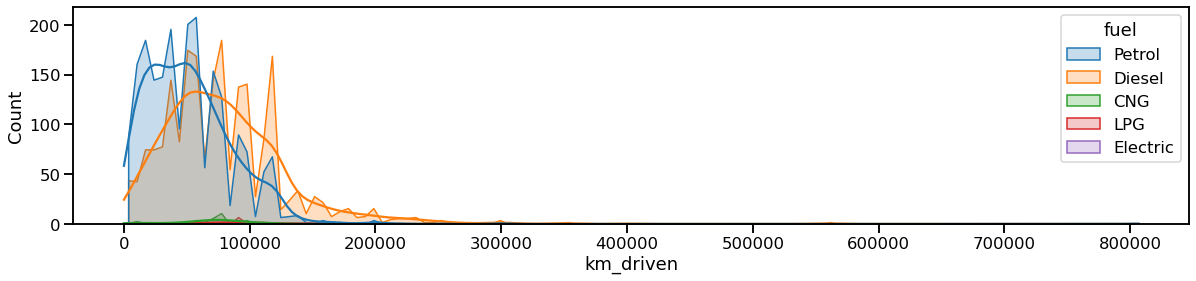

In [324]:
f = plt.figure(figsize=(20,4))
plt.ticklabel_format(style='plain')
sns.histplot(data= data , x = 'km_driven', hue = 'fuel',kde =True,element="poly")


<AxesSubplot:title={'center':'After applying log transformation on Km_driven'}, xlabel='km_driven_log', ylabel='Count'>

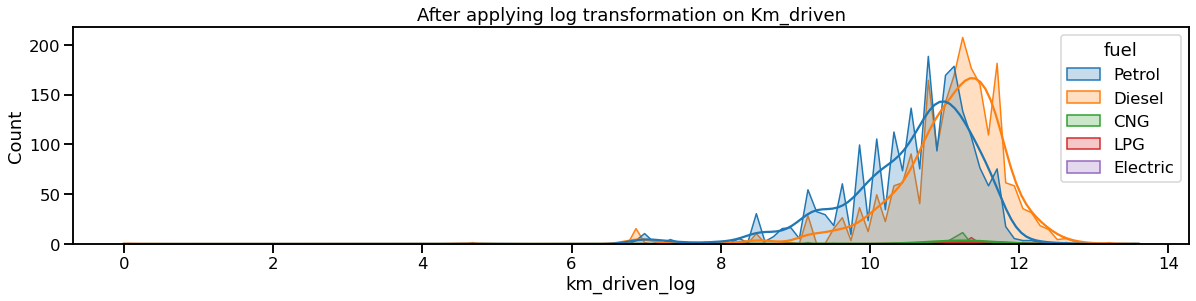

In [329]:
# Apply log tranformation on the km_driven column & create a new column
data['km_driven_log']=np.log(data['km_driven'])

f = plt.figure(figsize=(20,4))
plt.ticklabel_format(style='plain')
plt.title("After applying log transformation on Km_driven")
sns.histplot(data= data , x = 'km_driven_log', hue = 'fuel',kde =True,element="poly")

# Removing the new created column
del data['km_driven_log']

In [377]:
gk = data.groupby('name')
gk.get_group('Ambassador CLASSIC 1500 DSL AC')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,km_driven_log
3912,Ambassador CLASSIC 1500 DSL AC,2005,120000,50000,Diesel,Individual,Manual,Second Owner,10.819778
4016,Ambassador CLASSIC 1500 DSL AC,2005,120000,50000,Diesel,Individual,Manual,Second Owner,10.819778


<AxesSubplot:xlabel='km_driven', ylabel='seller_type'>

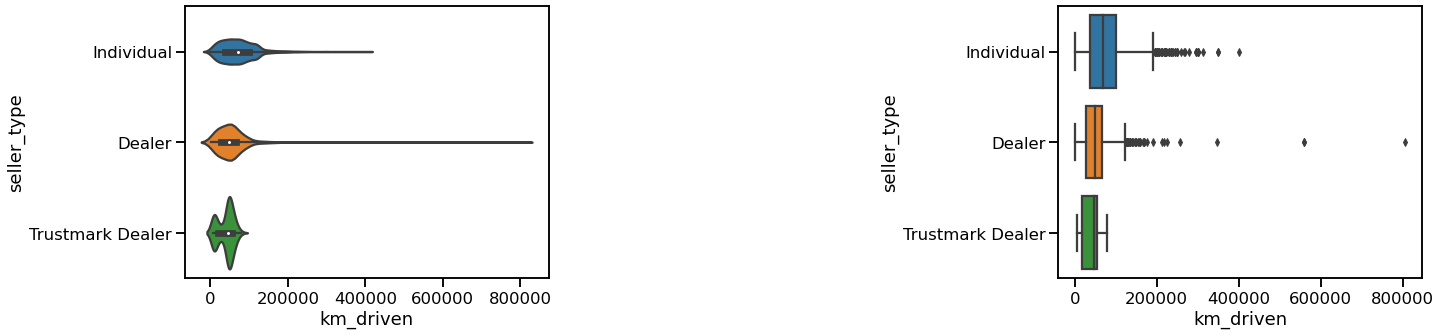

In [379]:
f = plt.figure(figsize=(30,5))
ax = f.add_subplot(1,4,1)
plt.ticklabel_format(style='plain')
sns.violinplot(data['km_driven'],data['seller_type'])

ax = f.add_subplot(1,4,3)
plt.ticklabel_format(style='plain')
sns.boxplot(data['km_driven'],data['seller_type'])


<AxesSubplot:xlabel='km_driven', ylabel='seller_type'>

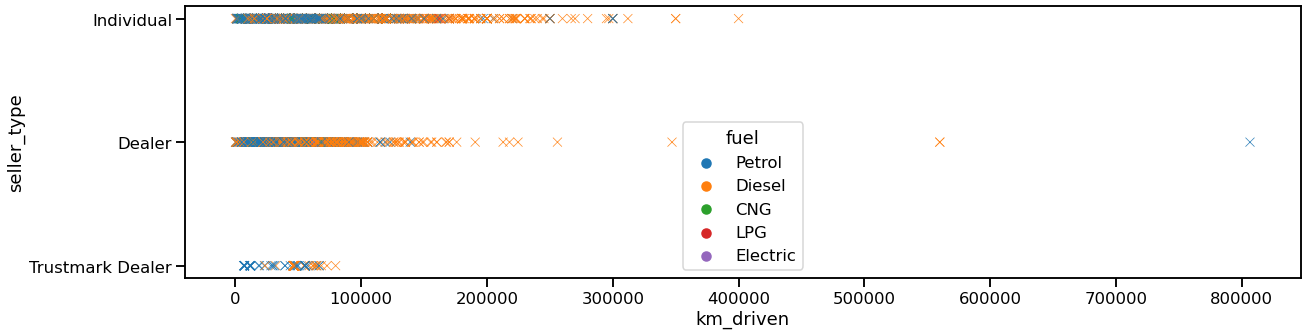

In [394]:
f = plt.figure(figsize=(20,5))
plt.ticklabel_format(style='plain')
sns.scatterplot(data=data, x ='km_driven',y = 'seller_type',hue='fuel',alpha=0.9,marker="x")

The number of cars in each category :-


| Fuel | Individual | Dealer | Trustmark Dealer |
| --- | --- | --- |---|
| Petrol  | 1615 | 454 | 54  |
| Diesel  | 1576 | 529 | 48  |
| CNG     | 31 | 9 | - |
| LPG     | 22 | 1 | - |
| Electric | - | 1 | - |


1. we can see that Individual & Trustmark Dealers have sold more number of Petrol cars 
2. Dealers have sold more number of Diesel cars when compared to other fuel types
3. We have data for only 1 Electric car whose seller is a Dealer


In [426]:

g = data.groupby(['seller_type','fuel'])
g.first()
#print(len(g.get_group(('Individual','Elecric'))))
#print(len(g.get_group(('Dealer','Electric'))))
#print(len(g.get_group(('Trustmark Dealer','Elecric'))))

name  ...         owner
seller_type      fuel                                       ...              
Dealer           CNG           Tata Indigo CS Emax CNG GLX  ...   First Owner
                 Diesel        Hyundai Venue SX Opt Diesel  ...   First Owner
                 Electric              Toyota Camry Hybrid  ...  Second Owner
                 LPG                Maruti Wagon R Duo Lxi  ...   First Owner
                 Petrol    Toyota Corolla Altis 1.8 VL CVT  ...   First Owner
Individual       CNG              Maruti Celerio Green VXI  ...   First Owner
                 Diesel               Hyundai Verna 1.6 SX  ...   First Owner
                 LPG                Maruti Wagon R DUO LPG  ...   First Owner
                 Petrol                      Maruti 800 AC  ...   First Owner
Trustmark Dealer Diesel    Maruti S-Cross Zeta DDiS 200 SH  ...   First Owner
                 Petrol              Maruti Swift ZXI BSIV  ...   First Owner

[11 rows x 6 columns]

<AxesSubplot:xlabel='selling_price', ylabel='transmission'>

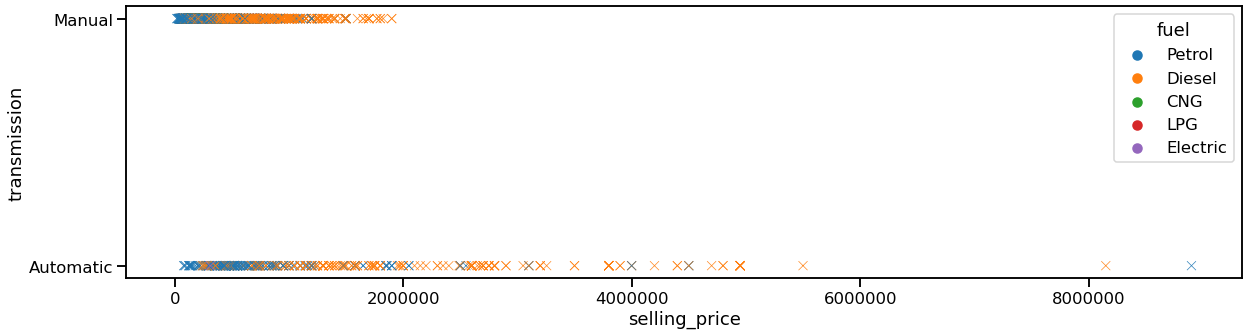

In [429]:
f = plt.figure(figsize=(20,5))
plt.ticklabel_format(style='plain')
sns.scatterplot(data=data, x ='selling_price',y = 'transmission',hue='fuel',alpha=0.9,marker="x")

In [430]:
gd = data.groupby(['transmission','fuel'])
gd.first()

name  ...         owner
transmission fuel                                       ...              
Automatic    Diesel         Jaguar XF 2.2 Litre Luxury  ...   First Owner
             Electric              Toyota Camry Hybrid  ...  Second Owner
             Petrol    Toyota Corolla Altis 1.8 VL CVT  ...   First Owner
Manual       CNG              Maruti Celerio Green VXI  ...   First Owner
             Diesel               Hyundai Verna 1.6 SX  ...   First Owner
             LPG                Maruti Wagon R DUO LPG  ...   First Owner
             Petrol                      Maruti 800 AC  ...   First Owner

[7 rows x 6 columns]

In [436]:
for i in ['Petrol','Diesel','CNG','LPG','Electric'] :
    try:
        print(i,len(gd.get_group(('Manual',i))))
    except:
        pass

Petrol 1930
Diesel 1899
CNG 40
LPG 23


The number of cars in each category :-

| Fuel | Automatic | Manual |  |
| --- | --- | --- |---|
| Petrol  | 193 | 1930 | 
| Diesel  | 254 | 1899 | 
| CNG     | - | 40 | 
| LPG     | - | 23 | 
| Electric | 1 | - | 


1. For the given training data, only 10% of cars are Automatic and 90% of cars are Manual
2. All the CNG & LPG cars for this data are of Manual type and 1 Electric car is of type Automatic 



In [447]:
(data['transmission'].value_counts() / len(data['transmission'])) * 100 

Manual       89.677419
Automatic    10.322581
Name: transmission, dtype: float64

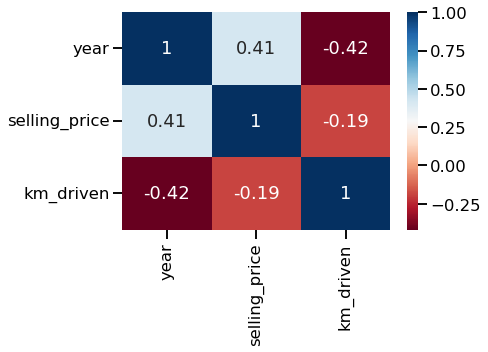

In [452]:
sns.heatmap(data.corr(), annot=True, cmap="RdBu")
plt.show()

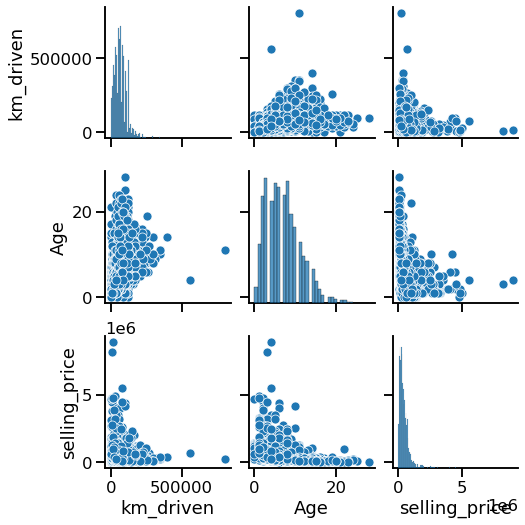

In [604]:
sns.pairplot(data,vars=['km_driven','Age','selling_price'])

# Data Preparation 

In [495]:
# First lets remove duplicated data
data.drop_duplicates(inplace=True)
# Reset the Index after removing duplicates
data.reset_index(drop=True,inplace=True)

data.shape


(3577, 8)

In [497]:
data.corr()

,year,selling_price,km_driven
year,1.00000,0.424260,-0.417490
selling_price,0.42426,1.000000,-0.187359
km_driven,-0.41749,-0.187359,1.000000


Since the dataset is from 2020 ( the maximum year), we will create a new column Age which value is 2020 - Year.
Then remove the year column

In [498]:
data['Age'] = 2020 - data['year']
del data['year']
data.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,Age
0,Maruti 800 AC,60000,70000,Petrol,Individual,Manual,First Owner,13
1,Maruti Wagon R LXI Minor,135000,50000,Petrol,Individual,Manual,First Owner,13
2,Hyundai Verna 1.6 SX,600000,100000,Diesel,Individual,Manual,First Owner,8
3,Datsun RediGO T Option,250000,46000,Petrol,Individual,Manual,First Owner,3
4,Honda Amaze VX i-DTEC,450000,141000,Diesel,Individual,Manual,Second Owner,6


The name column in the dataset is not required for the target variable 'Selling_Price'. Hence it can be removed from the dataframe

In [499]:
del data['name']
data.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,Age
0,60000,70000,Petrol,Individual,Manual,First Owner,13
1,135000,50000,Petrol,Individual,Manual,First Owner,13
2,600000,100000,Diesel,Individual,Manual,First Owner,8
3,250000,46000,Petrol,Individual,Manual,First Owner,3
4,450000,141000,Diesel,Individual,Manual,Second Owner,6


In [500]:
data['owner'].unique()


array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

Lets seperate Dependent variable 'Selling Price' & Independendt variables 


In [501]:
data_X = data.iloc[:,1:]
data_X.head()

,km_driven,fuel,seller_type,transmission,owner,Age
0,70000,Petrol,Individual,Manual,First Owner,13
1,50000,Petrol,Individual,Manual,First Owner,13
2,100000,Diesel,Individual,Manual,First Owner,8
3,46000,Petrol,Individual,Manual,First Owner,3
4,141000,Diesel,Individual,Manual,Second Owner,6


In [502]:
data_Y = data.iloc[:,0]
data_Y.head()

0     60000
1    135000
2    600000
3    250000
4    450000
Name: selling_price, dtype: int64

In [503]:
# Converting Categorical variables into Numeric 
data_X = pd.get_dummies(data_X,columns=['fuel','seller_type','transmission','owner'],drop_first=True)
data_X.head()

,km_driven,Age,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,70000,13,0,0,0,1,1,0,1,0,0,0,0
1,50000,13,0,0,0,1,1,0,1,0,0,0,0
2,100000,8,1,0,0,0,1,0,1,0,0,0,0
3,46000,3,0,0,0,1,1,0,1,0,0,0,0
4,141000,6,1,0,0,0,1,0,1,0,1,0,0


In [596]:
data_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3577 entries, 0 to 3576
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   km_driven                     3577 non-null   int64
 1   Age                           3577 non-null   int64
 2   fuel_Diesel                   3577 non-null   uint8
 3   fuel_Electric                 3577 non-null   uint8
 4   fuel_LPG                      3577 non-null   uint8
 5   fuel_Petrol                   3577 non-null   uint8
 6   seller_type_Individual        3577 non-null   uint8
 7   seller_type_Trustmark Dealer  3577 non-null   uint8
 8   transmission_Manual           3577 non-null   uint8
 9   owner_Fourth & Above Owner    3577 non-null   uint8
 10  owner_Second Owner            3577 non-null   uint8
 11  owner_Test Drive Car          3577 non-null   uint8
 12  owner_Third Owner             3577 non-null   uint8
dtypes: int64(2), uint8(11)
memory usa

<AxesSubplot:>

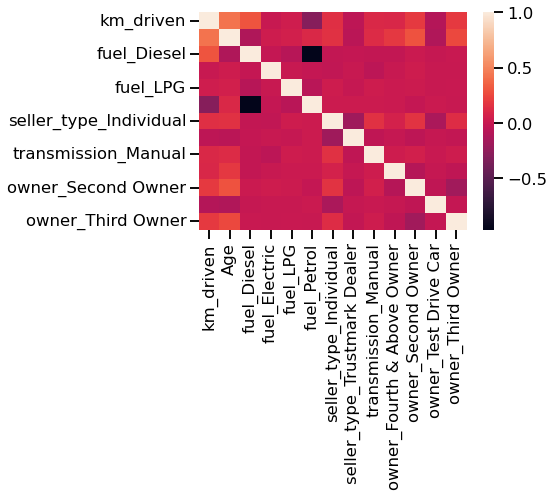

In [504]:
sns.heatmap(data_X.corr(method='pearson'))

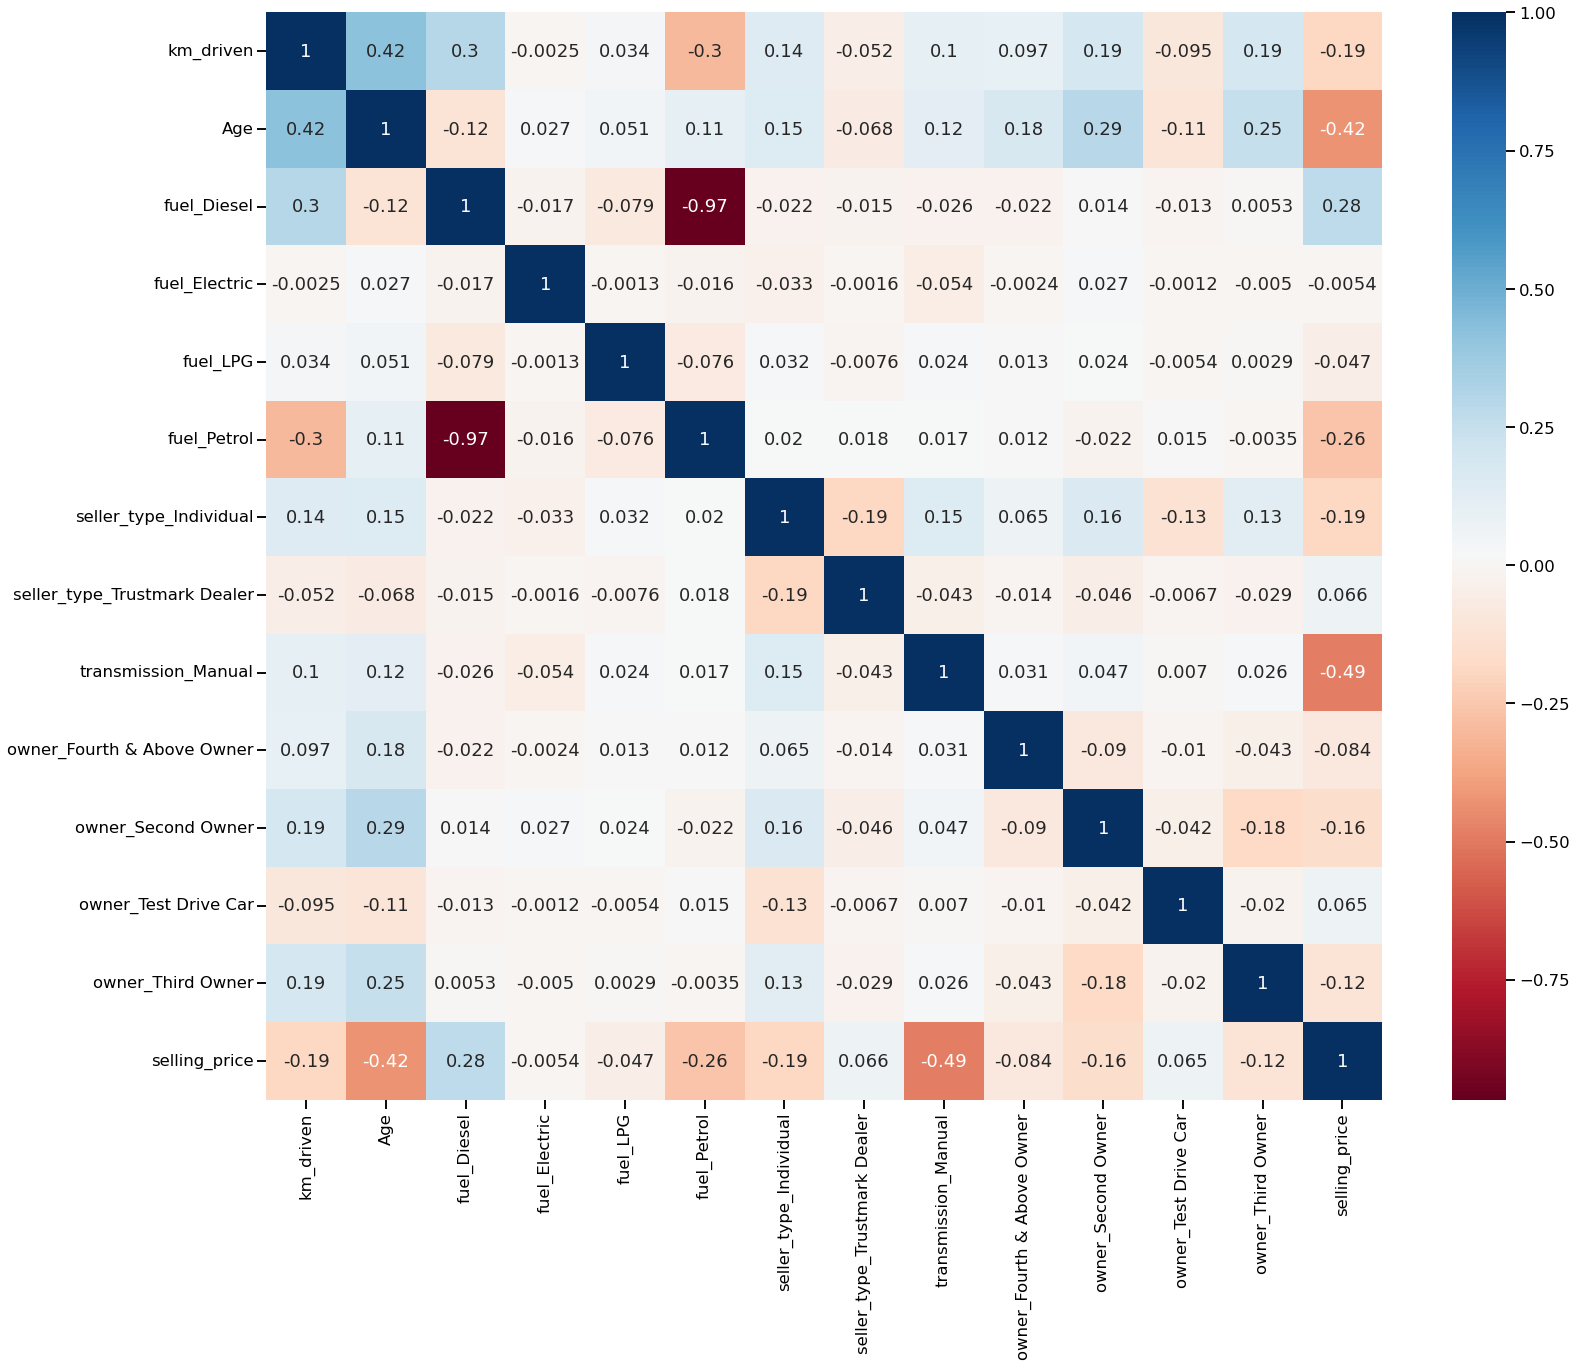

In [619]:

plt.figure(figsize = (25,20))
sns.heatmap(data_X.join(data_Y).corr(), annot = True, cmap="RdBu")
plt.show()

From the heatmap we can observere what features are multi-collinear with each other.
we can also see which independent variables are high collinear with the 'Selling_Price'

In [652]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_Y, test_size=0.33, random_state=42)

In [556]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler



In [667]:
scaler = StandardScaler()
scaled_data_X = scaler.fit_transform(X_train)
print(scaled_data_X)

X_test_scaled = scaler.fit_transform(X_test)


[[ 1.56782175 -0.258178    0.98180162 ... -0.61143537 -0.06791288
  -0.29263734]
 [-0.20465222 -0.49582476  0.98180162 ... -0.61143537 -0.06791288
  -0.29263734]
 [ 0.00387413 -0.02053125 -1.0185357  ...  1.63549583 -0.06791288
  -0.29263734]
 ...
 [-0.41317858 -1.20876502  0.98180162 ... -0.61143537 -0.06791288
  -0.29263734]
 [-0.7259681  -0.97111826  0.98180162 ... -0.61143537 -0.06791288
  -0.29263734]
 [-0.05868378  0.2171155  -1.0185357  ...  1.63549583 -0.06791288
  -0.29263734]]


In [668]:
X_train_scaled = pd.DataFrame(scaled_data_X, columns = data_X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = data_X.columns)

X_train_scaled.head()



,km_driven,Age,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,1.567822,-0.258178,0.981802,0.0,-0.089405,-0.944762,0.518717,-0.087002,0.302608,-0.147473,-0.611435,-0.067913,-0.292637
1,-0.204652,-0.495825,0.981802,0.0,-0.089405,-0.944762,0.518717,-0.087002,0.302608,-0.147473,-0.611435,-0.067913,-0.292637
2,0.003874,-0.020531,-1.018536,0.0,-0.089405,1.058468,0.518717,-0.087002,0.302608,-0.147473,1.635496,-0.067913,-0.292637
3,0.316664,1.405349,-1.018536,0.0,-0.089405,1.058468,0.518717,-0.087002,0.302608,-0.147473,1.635496,-0.067913,-0.292637
4,0.149843,-0.495825,0.981802,0.0,-0.089405,-0.944762,0.518717,-0.087002,0.302608,-0.147473,-0.611435,-0.067913,-0.292637


In [669]:
normalizer = MinMaxScaler()
normalized_data_X = normalizer.fit_transform(X_train)
print(normalized_data_X)

X_test_normalized = normalizer.fit_transform(X_test)

X_test_normalized = pd.DataFrame(X_test_normalized, columns = data_X.columns)
X_train_normalized = pd.DataFrame(normalized_data_X, columns = data_X.columns)
X_train_normalized.head()

[[0.17976613 0.21428571 1.         ... 0.         0.         0.        ]
 [0.07438526 0.17857143 1.         ... 0.         0.         0.        ]
 [0.08678301 0.25       0.         ... 1.         0.         0.        ]
 ...
 [0.06198751 0.07142857 1.         ... 0.         0.         0.        ]
 [0.04339088 0.10714286 1.         ... 0.         0.         0.        ]
 [0.08306368 0.28571429 0.         ... 1.         0.         0.        ]]


,km_driven,Age,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,0.179766,0.214286,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.074385,0.178571,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.086783,0.250000,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.105380,0.464286,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.095461,0.178571,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [657]:
from sklearn.linear_model import LinearRegression


In [670]:
LR_model = LinearRegression(fit_intercept=True)
LR_model.fit(X_train_scaled,y_train)


LinearRegression()

In [671]:
# Lets find the predictions on the test dataset


y_Pred = LR_model.predict(X_test_scaled)
y_Pred

array([478389.89274061, 474690.16968298, 629465.29517606, ...,
       762647.9555155 , 543108.67377562,  28496.53474261])

In [672]:
LR_model.coef_

array([-2.94755052e+04, -1.41341594e+05,  1.37551818e+05,  4.36557457e-11,
        3.89815212e+03,  1.01678286e+04, -1.63701063e+04,  3.65489535e+03,
       -2.09660431e+05, -7.38598464e+03, -2.18658324e+04,  1.60049825e+04,
       -1.87047675e+04])

In [673]:
LR_model.intercept_

469223.8760434057

In [661]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
MSE = mean_squared_error(y_test,y_Pred)
MSE

165271011013.20657

In [674]:
MAE = mean_absolute_error(y_test,y_Pred)
MAE

205332.04677528876

In [675]:
r2_score(y_test,y_Pred)

0.4317236424021439

Text(0.5, 1.0, 'Residual Plot')

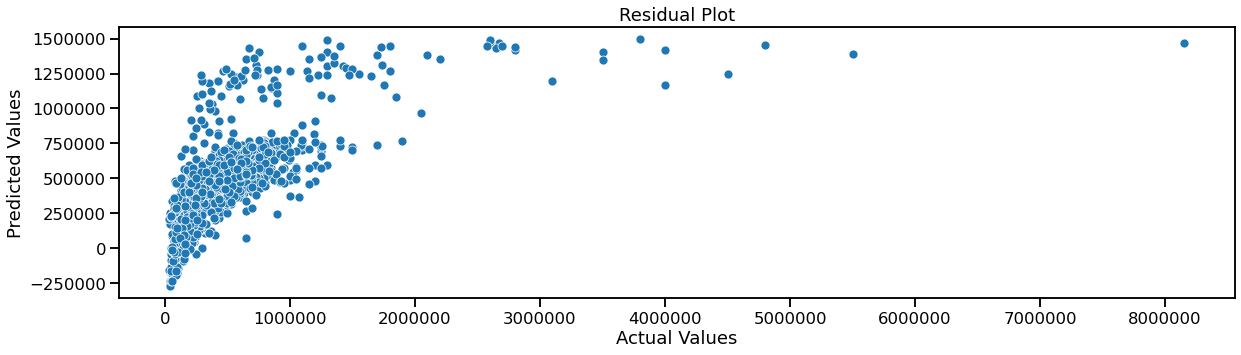

In [676]:
f = plt.figure(figsize=(20,5))
plt.ticklabel_format(style='plain')

sns.scatterplot(y_test,y_Pred)
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.title('Residual Plot')

In [677]:
len(y_Pred[y_Pred <0])

60

1. we observe that for 62 samples the model has predicted selling price as -ve which is totally incorrect
2. Mean Absolute Deviation is 207327.51666383236 which is very high 
3. The R-Squared is 0.4346847137047435 which says the model is bad

<AxesSubplot:xlabel='km_driven', ylabel='selling_price'>

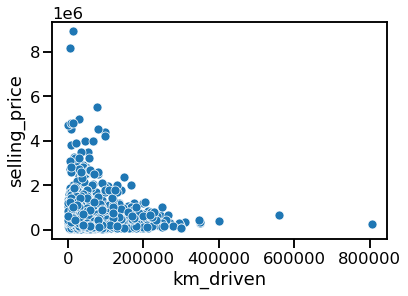

In [678]:
sns.scatterplot(data['km_driven'],data['selling_price'])

In [567]:
data['Age']

0       13
1       13
2        8
3        3
4        6
        ..
3572     6
3573     6
3574    11
3575     4
3576     4
Name: Age, Length: 3577, dtype: int64

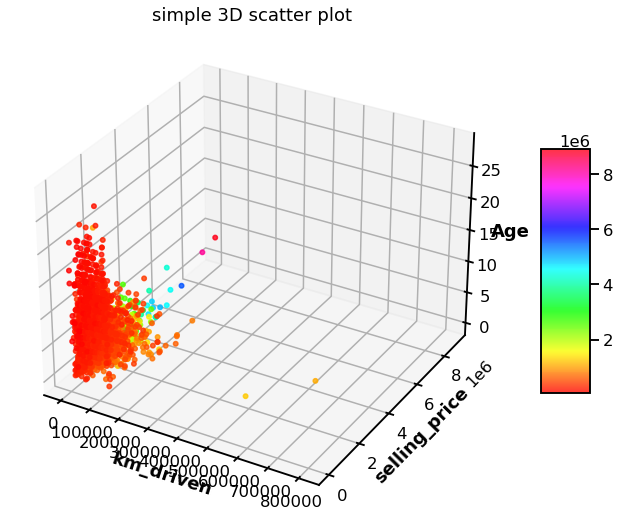

In [679]:
# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
   
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
   
# Creating color map
my_cmap = plt.get_cmap('hsv')
# Creating plot
sctt = ax.scatter3D(data['km_driven'],data['selling_price'], data['Age'],c = (data['km_driven']+data['selling_price']+data['Age']) ,alpha = 0.8,cmap = my_cmap,)
plt.title("simple 3D scatter plot")
ax.set_xlabel('km_driven', fontweight ='bold')
ax.set_ylabel('selling_price', fontweight ='bold')
ax.set_zlabel('Age', fontweight ='bold')

fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)

Lets check with the Min_Max Scaled Data

In [680]:
LR_model.fit(X_train_normalized,y_train)

LinearRegression()

In [681]:
# Lets find the predictions on the test dataset
y_Pred = LR_model.predict(X_test_normalized)
y_Pred

array([ 460495.09258832,  434436.82319747,  498423.35635698, ...,
        747379.77240189,  458412.29308926, -128292.77537682])

In [682]:
LR_model.coef_

array([-495768.96941912, -940502.38732989,  275150.03419325,
             0.        ,   43949.5269469 ,   20368.49563068,
        -40050.27132132,   42327.20414961, -756289.37286197,
        -51172.74364149,  -49131.0210644 ,  236756.26592463,
        -69391.62526502])

In [683]:
LR_model.intercept_

1343036.1669133066

In [684]:
LR_model.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [685]:
MSE = mean_squared_error(y_test,y_Pred)
MSE

174787168047.4838

In [588]:
MAE = mean_absolute_error(y_test,y_Pred)
MAE

207327.51666383233

In [686]:
r2_score(y_test,y_Pred)

0.4021343650060649

Text(0.5, 1.0, 'Residual Plot')

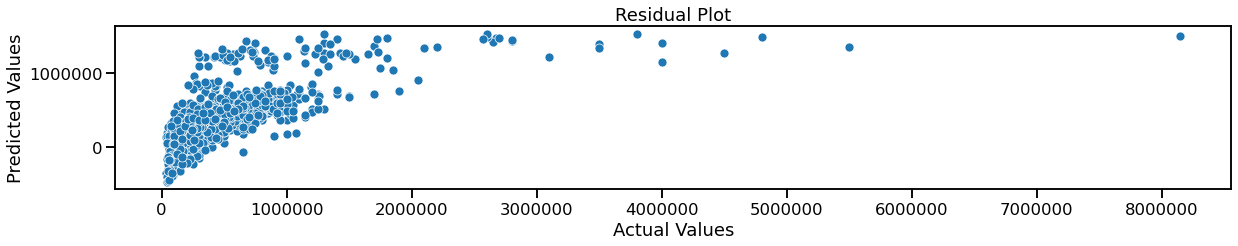

In [687]:
f = plt.figure(figsize=(20,3))
plt.ticklabel_format(style='plain')

sns.scatterplot(y_test,y_Pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Residual Plot')

Text(0.5, 1.0, 'Residual log - log Plot')

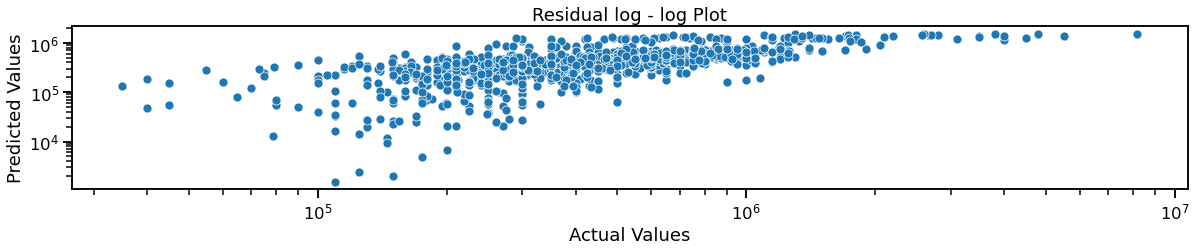

In [688]:
f = plt.figure(figsize=(20,3))
plt.ticklabel_format(style='plain')

sns.scatterplot(y_test,y_Pred)
plt.xscale('log')
plt.yscale('log')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Residual log - log Plot')

Train score: 1.7637308270088167e+21
Test score: 1.6781761086251414e+21


Text(0.5, 0, 'y_test - y_pred_test')

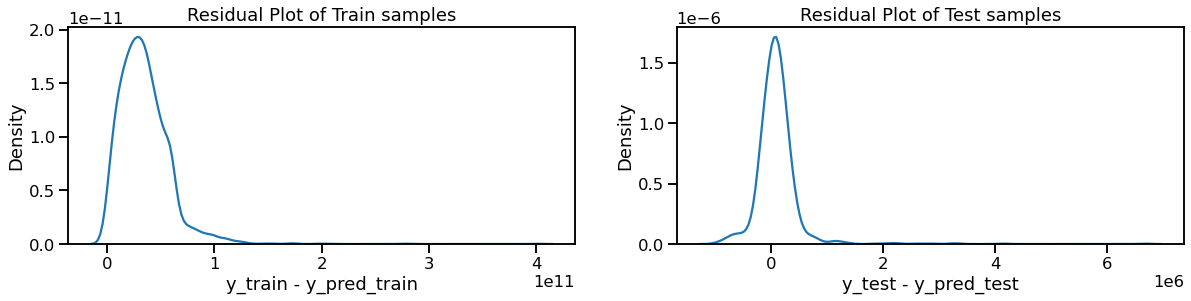

In [690]:
print('Train score:', mean_squared_error(LR_model.predict(X_train), y_train))
print('Test score:', mean_squared_error(LR_model.predict(X_test), y_test))


fig, ax = plt.subplots(1,2,figsize = (20,4))
ax[0].set_title('Residual Plot of Train samples')
sns.distplot((y_train - LR_model.predict(X_train)),hist = False,ax = ax[0])
ax[0].set_xlabel('y_train - y_pred_train')


ax[1].set_title('Residual Plot of Test samples')
sns.distplot((y_test - y_Pred),hist = False,ax = ax[1])
ax[1].set_xlabel('y_test - y_pred_test')



# Ridge Regression 

In [692]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

In [703]:
# Creating Ridge model object
model = Ridge()
# range of alpha 
alpha = np.logspace(-3,3,num=14)

# Creating RandomizedSearchCV to find the best estimator of hyperparameter
search = RandomizedSearchCV(estimator = model, param_distributions = dict(alpha=alpha),scoring='neg_mean_absolute_error')
results = search.fit(X_train_normalized,y_train)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -203914.904
Config: {'alpha': 0.5878016072274912}


Text(0.5, 1.0, 'Residual Plot')

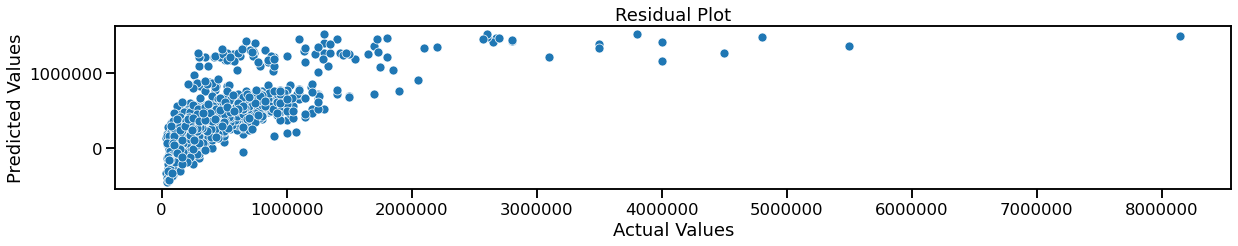

In [705]:
y_Pred=search.predict(X_test_normalized)
f = plt.figure(figsize=(20,3))
plt.ticklabel_format(style='plain')

sns.scatterplot(y_test,y_Pred)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Residual Plot')

# Recursive Feature Selection

We will use sklearn.feature_selection.RFE 

In [706]:
from sklearn.feature_selection import RFE


In [762]:
lm = LinearRegression()
lm.fit(X_train_normalized, y_train)

rfe = RFE(estimator = lm, n_features_to_select=10)            
rfe = rfe.fit(X_train_normalized, y_train)

In [774]:
list(zip(X_train_normalized.columns,rfe.support_,rfe.ranking_))

[('km_driven', True, 1),
 ('Age', True, 1),
 ('fuel_Diesel', True, 1),
 ('fuel_Electric', False, 4),
 ('fuel_LPG', False, 2),
 ('fuel_Petrol', False, 3),
 ('seller_type_Individual', True, 1),
 ('seller_type_Trustmark Dealer', True, 1),
 ('transmission_Manual', True, 1),
 ('owner_Fourth & Above Owner', True, 1),
 ('owner_Second Owner', True, 1),
 ('owner_Test Drive Car', True, 1),
 ('owner_Third Owner', True, 1)]

In [764]:
rfe.support_

array([ True,  True,  True, False, False, False,  True,  True,  True,
        True,  True,  True,  True])

In [765]:
imp_cols = X_train_normalized.columns[rfe.support_]
imp_cols

Index(['km_driven', 'Age', 'fuel_Diesel', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Manual',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner'],
      dtype='object')

In [766]:
X_train_normalized_rfe = X_train_normalized[imp_cols]
X_train_normalized_rfe.head()

,km_driven,Age,fuel_Diesel,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,0.179766,0.214286,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.074385,0.178571,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.086783,0.250000,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.105380,0.464286,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.095461,0.178571,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [767]:
LR_model_rfe = LinearRegression()
LR_model_rfe.fit(X_train_normalized_rfe,y_train)



LinearRegression()

In [768]:
LR_model_rfe.coef_

array([-495144.32899541, -939249.78670135,  254899.88326321,
        -39739.09375618,   42703.48710762, -756471.92832577,
        -51414.66818175,  -49271.96353009,  237345.98978526,
        -69579.64069204])

In [769]:
LR_model_rfe.intercept_

1362905.6295900987

In [770]:
y_Pred = LR_model_rfe.predict(X_test_normalized[imp_cols])

Text(0.5, 1.0, 'Residual Plot')

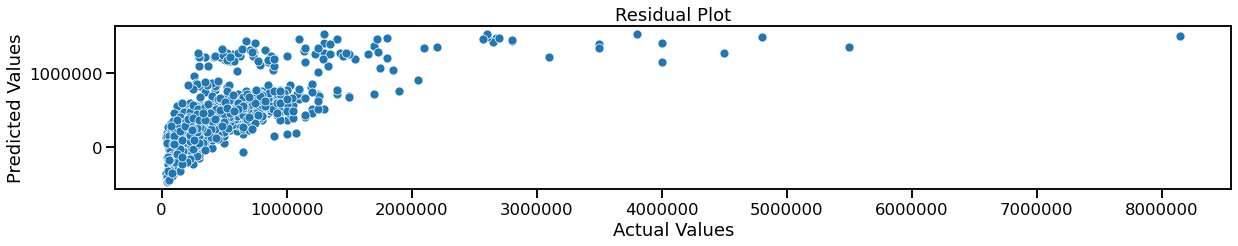

In [771]:
f = plt.figure(figsize=(20,3))
plt.ticklabel_format(style='plain')

sns.scatterplot(y_test,y_Pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Residual Plot')

In [772]:
MAE = mean_absolute_error(y_test,y_Pred)
MAE

224997.8034227667

In [775]:
r2_score(y_test,y_Pred)

0.4022903307849206

Text(0.5, 0, 'Errors')

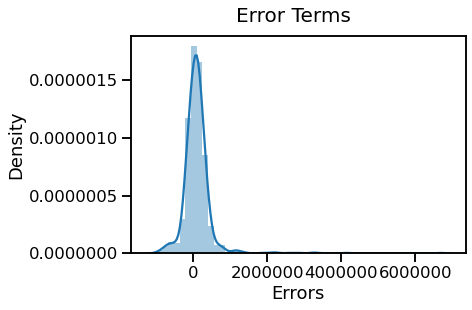

In [780]:
res = y_test-y_Pred
# Plot the histogram of the error terms
fig = plt.figure()
plt.ticklabel_format(style='plain')
sns.distplot(res,kde=True)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)  